## 1. Import and Install Dependencies

In [1]:
! conda install tensorflow==2.4.1 opencv-python mediapipe sklearn matplotlib

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
video_path_1 = "C:\\Users\\Nisa\\Downloads\\zzz\\New folder\\0"
video_file = "1.mp4"
video = os.path.join(video_path_1 , video_file)

In [8]:
cap = cv2.VideoCapture(video)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    if not cap.isOpened():
        print("Error opening video file")
        exit()

    while True:

        # Read feed
        ret, frame = cap.read()
        if not ret:
        # If no frame was read, break out of the loop
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
print(image)

[[[ 59 103 214]
  [ 56 100 211]
  [ 55  99 210]
  ...
  [ 68 123 255]
  [ 68 123 255]
  [ 68 123 255]]

 [[ 59 103 214]
  [ 56 100 211]
  [ 55  99 210]
  ...
  [ 68 123 255]
  [ 68 123 255]
  [ 68 123 255]]

 [[ 62 106 217]
  [ 58 102 213]
  [ 57 101 212]
  ...
  [ 68 123 255]
  [ 68 123 255]
  [ 67 122 254]]

 ...

 [[ 39  86 181]
  [ 39  86 181]
  [ 39  86 181]
  ...
  [ 36  78 201]
  [ 36  78 201]
  [ 35  77 200]]

 [[ 38  85 180]
  [ 38  85 180]
  [ 37  84 179]
  ...
  [ 36  78 201]
  [ 36  78 201]
  [ 35  77 200]]

 [[ 38  85 180]
  [ 38  85 180]
  [ 36  83 178]
  ...
  [ 36  78 201]
  [ 36  78 201]
  [ 35  77 200]]]


In [10]:
draw_landmarks(image, results)

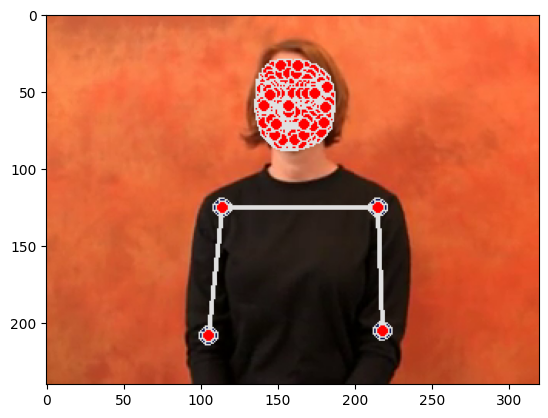

In [11]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint Values

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
result_test = extract_keypoints(results)
result_test

array([ 0.4935852 ,  0.2461403 , -0.83535719, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.4935852 ,  0.2461403 , -0.83535719, ...,  0.        ,
        0.        ,  0.        ])

## 4. Setup Folders for Collection

In [36]:
doc = "Docs"
text_file = "actions.txt"
with open(os.path.join(doc, text_file), 'r') as f:
    action_str = f.read() 

# list to np array
action_names = np.array(action_str.split('.'))
#action_names = action_names[:-1]
actions = np.arange(len(action_names))
print(action_names)
print(actions)

['"book" ' ' "drink" ' ' "computer" ' ' "before"' ' "chair" ' ' "go" '
 ' "clothes" ' ' "who" ' ' "candy" ' ' "cousin"']
[0 1 2 3 4 5 6 7 8 9]


In [37]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 16

# Videos are going to be 30 frames in length
sequence_length = 25

# Folder start
start_folder = 16

In [38]:
# Remove the directory if it exists
import shutil
if os.path.exists(DATA_PATH):
    shutil.rmtree(DATA_PATH)

In [39]:
# Create the directory
os.makedirs(DATA_PATH , exist_ok=True)

for action in actions:
    os.makedirs(os.path.join(DATA_PATH , str(action)) , exist_ok=True)


for action in actions: 
    # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, str(action), str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [ ]:
# import os
# import cv2
# import mediapipe as mp
# import numpy as np

# # Initialize MediaPipe Holistic
# mp_holistic = mp.solutions.holistic
# mp_drawing = mp.solutions.drawing_utils

# def mediapipe_detection(image, holistic):
#     # Your logic for mediapipe detection
#     results = holistic.process(image)
#     return image, results

# def draw_styled_landmarks(image, results):
#     # Your logic for drawing landmarks
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

# a = 0
# filename_1 = "1.mp4"
# filename_2 = "2.mp4"
# filename_3 = "3.mp4"
# filename_4 = "4.mp4"
# filename_5 = "5.mp4"
# folder_path = [filename_1, filename_2, filename_3, filename_4, filename_5]

# # Number of frames to capture
# num_frames_to_capture = 20

# # Loop through each video file
# for video_file in folder_path:
#     a = a + 1
#     print(a)
#     cap = cv2.VideoCapture(video_file)
#     with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#         if not cap.isOpened():
#             print("Error opening video file")
#             exit()

#         frame_count = 0
#         while True:
#             ret, frame = cap.read()
#             if not ret or frame_count >= num_frames_to_capture:
#                 break

#             image, results = mediapipe_detection(frame, holistic)
#             draw_styled_landmarks(image, results)
#             print(image)

#             keypoints = extract_keypoints(results)  # Implement your logic for extracting keypoints
#             print(keypoints)

#             npy_path = os.path.join(DATA_PATH, str(0), str(a), str(frame_count))
#             np.save(npy_path, keypoints)

#             frame_count += 1

#             # Break gracefully
#             if cv2.waitKey(10) & 0xFF == ord('q'):
#                 break

#         cap.release()  # Release the video capture object
#         cv2.destroyAllWindows()


In [126]:
# import os
# import cv2
# import mediapipe as mp
# import numpy as np
# import glob

# # Initialize MediaPipe Holistic
# mp_holistic = mp.solutions.holistic
# mp_drawing = mp.solutions.drawing_utils

# def mediapipe_detection(image, holistic):
#     # Your logic for mediapipe detection
#     results = holistic.process(image)
#     return image, results

# def draw_styled_landmarks(image, results):
#     # Your logic for drawing landmarks
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

# root_folder_path = "C:\\Users\\Nisa\\Downloads\\zzz\\New folder"  # Specify the root folder path here

# # Number of frames to capture
# num_frames_to_capture = 30
# b = -1

# # Loop through each subfolder in the root folder
# for folder in os.listdir(root_folder_path):
#     b = b + 1
#     subfolder_path = os.path.join(root_folder_path, folder)
#     if os.path.isdir(subfolder_path):
#         video_files = glob.glob(os.path.join(subfolder_path, "*.mp4"))
#         a = 0
#         for video_file in video_files:
#             a = a + 1
#             cap = cv2.VideoCapture(video_file)
#             with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#                 if not cap.isOpened():
#                     print("Error opening video file")
#                     exit()

#                 frame_count = 0
#                 while True:
#                     ret, frame = cap.read()
#                     if not ret or frame_count >= num_frames_to_capture:
#                         break

#                     image, results = mediapipe_detection(frame, holistic)
#                     draw_styled_landmarks(image, results)
                    

#                     keypoints = extract_keypoints(results)  # Implement your logic for extracting keypoints
                    

#                     #npy_path = os.path.join(subfolder_path, f"frame_{frame_count}.npy")
#                     npy_path = os.path.join(DATA_PATH, str(b), str(a), str(frame_count))
#                     np.save(npy_path, keypoints)

#                     frame_count += 1

#                     # Break gracefully
#                     if cv2.waitKey(10) & 0xFF == ord('q'):
#                         break

#                 cap.release()  # Release the video capture object
#                 cv2.destroyAllWindows()


In [40]:
# Specify the file path
file_path = "C:\\Users\\Nisa\\OneDrive\\Desktop\\missing.txt"
# Initialize an empty list to store the data
data_list = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    # Use list comprehension to create a list from the lines in the file
    data_list = [line.strip() for line in file]

# Print the loaded list
print(data_list)


['65225', '68011', '68208', '68012', '70212', '70266', '07085', '07086', '07087', '07088', '07089', '07090', '07091', '07092', '07093', '07094', '07095', '07096', '07097', '07098', '07071', '07072', '07073', '67424', '07075', '07076', '07077', '07078', '07079', '07080', '07081', '07082', '07083', '07084', '70173', '68538', '68042', '68660', '68041', '17725', '17726', '17727', '17728', '17729', '17730', '17731', '17732', '17714', '17715', '17716', '17717', '17718', '67594', '17719', '12306', '68028', '69054', '12329', '12330', '12331', '12332', '12333', '12335', '12336', '12337', '67519', '12321', '12322', '12323', '12324', '05724', '70348', '68007', '05744', '05746', '05747', '05748', '05735', '05736', '05737', '09847', '70230', '68580', '70263', '68019', '09865', '09866', '09867', '09853', '09855', '09856', '67483', '09857', '09858', '09859', '09860', '09861', '09862', '09863', '24857', '68292', '24965', '24969', '24970', '24971', '24972', '24948', '67715', '24950', '24951', '11305', 

In [41]:
# Specify the file path
file_path_2 = "C:\\Users\\Nisa\\OneDrive\\Desktop\\Untitled spreadsheet - wlasl_class_list.txt"
# Initialize an empty list to store the data
data_list_2 = []

# Open the file and read its contents
with open(file_path_2, 'r') as file:
    # Use list comprehension to create a list from the lines in the file
    data_list_2 = [line.strip() for line in file]
    

# Display the modified list
print(data_list_2)
print(len(data_list_2))

['book', 'drink', 'computer', 'before', 'chair', 'go', 'clothes', 'who', 'candy', 'cousin']
10


**Video Colection**

In [42]:
import os
import glob

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def mediapipe_detection(image, holistic):
    # Your logic for mediapipe detection
    results = holistic.process(image)
    return image, results

def draw_styled_landmarks(image, results):
    # Your logic for drawing landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

# Number of frames to capture
num_frames_to_capture = 30

import json
with open("C:\\Users\\Nisa\\OneDrive\\Desktop\\WLASL_v0.3.json",'r') as f:
    json_object = json.loads(f.read())
    
#elements = ["book"]  # Add more elements as needed
b = -1
for element in data_list_2:
    for item in json_object:
        if item["gloss"] == element:
            b = b + 1
            video_ids = [instance["video_id"] for instance in item["instances"]]
            #print(type(video_ids))
            video_ids_2 = [i for i in video_ids if i not in data_list]
            video_ids_2 = video_ids_2 + video_ids_2 + video_ids_2 + video_ids_2 + video_ids_2 +video_ids_2 + video_ids_2 + video_ids_2
            video_ids_2 = video_ids_2[:16]
            
            #print(len(video_ids_2))
            #print(len(data_list))
            print(f"Video IDs for '{element}': {video_ids_2}")

            subfolder_path = "C:\\Users\\Nisa\\Downloads\\zzz\\videos"
            a = 0
            for video in video_ids_2:
                file_name = os.path.join(subfolder_path,f"{video}.mp4")
                print(file_name)
                a = a + 1
                cap = cv2.VideoCapture(file_name)
                with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                    if not cap.isOpened():
                        print("Error opening video file")
                        exit()

                    frame_count = 0
                    while True:
                        ret, frame = cap.read()
                        if not ret or frame_count >= num_frames_to_capture:
                            break

                        image, results = mediapipe_detection(frame, holistic)
                        draw_styled_landmarks(image, results)
                        

                        keypoints = extract_keypoints(results)  # Implement your logic for extracting keypoints
                        npy_path = os.path.join(DATA_PATH, str(b), str(a), str(frame_count))
                        np.save(npy_path, keypoints)

                        frame_count += 1

                        # Break gracefully
                        if cv2.waitKey(10) & 0xFF == ord('q'):
                            break

                    cap.release()  # Release the video capture object
                    cv2.destroyAllWindows()

                            
            break



Video IDs for 'book': ['69241', '07069', '07068', '07070', '07099', '07074', '69241', '07069', '07068', '07070', '07099', '07074', '69241', '07069', '07068', '07070']
C:\Users\Nisa\Downloads\zzz\videos\69241.mp4
C:\Users\Nisa\Downloads\zzz\videos\07069.mp4
C:\Users\Nisa\Downloads\zzz\videos\07068.mp4
C:\Users\Nisa\Downloads\zzz\videos\07070.mp4
C:\Users\Nisa\Downloads\zzz\videos\07099.mp4
C:\Users\Nisa\Downloads\zzz\videos\07074.mp4
C:\Users\Nisa\Downloads\zzz\videos\69241.mp4
C:\Users\Nisa\Downloads\zzz\videos\07069.mp4
C:\Users\Nisa\Downloads\zzz\videos\07068.mp4
C:\Users\Nisa\Downloads\zzz\videos\07070.mp4
C:\Users\Nisa\Downloads\zzz\videos\07099.mp4
C:\Users\Nisa\Downloads\zzz\videos\07074.mp4
C:\Users\Nisa\Downloads\zzz\videos\69241.mp4
C:\Users\Nisa\Downloads\zzz\videos\07069.mp4
C:\Users\Nisa\Downloads\zzz\videos\07068.mp4
C:\Users\Nisa\Downloads\zzz\videos\07070.mp4
Video IDs for 'drink': ['69302', '65539', '17710', '17733', '65540', '17734', '17711', '17712', '17713', '17709',

In [ ]:
# # # Loop through each video file

#     a = a + 1
#     print(a)
#     cap = cv2.VideoCapture(video_file)
#     with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#         if not cap.isOpened():
#             print("Error opening video file")
#             exit()
        
#         while True:
#             # for frame_num in range(sequence_length):
#             ret, frame = cap.read()
#             if not ret:
#                 break

#             image, results = mediapipe_detection(frame, holistic)
#             draw_styled_landmarks(image, results)
#             print(image)

#             keypoints = extract_keypoints(results)
#             print(keypoints)
#             npy_path = os.path.join(DATA_PATH, str(0), str(a), str(frame_num))
#             np.save(npy_path, keypoints)

#             # Break gracefully
#             if cv2.waitKey(10) & 0xFF == ord('q'):
#                 break

#         cap.release()  # Release the video capture object
#         cv2.destroyAllWindows()


In [ ]:
# import os
# import glob
# a = 0
# filename_1 = "C:\\Users\\Nisa\\Downloads\\check\\1.mp4"
# filename_2 = "C:\\Users\\Nisa\\Downloads\\check\\2.mp4"
# filename_3 = "C:\\Users\\Nisa\\Downloads\\check\\3.mp4"
# filename_4 ="C:\\Users\\Nisa\\Downloads\\check\\4.mp4"
# filename_5 = "C:\\Users\\Nisa\\Downloads\\check\\5.mp4"
# folder_path = [filename_1,filename_2, filename_3, filename_4, filename_5 ]
# # Loop through each video file
# for video_file in folder_path:
#     a = a + 1
#     print(a)
#     cap = cv2.VideoCapture(video_file)
#     with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#         if not cap.isOpened():
#             print("Error opening video file")
#             exit()
#         while True:
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
#                 print(image)
                
                
#                 keypoints = extract_keypoints(results)
#                 print(keypoints)
#                 npy_path = os.path.join(DATA_PATH, str(0), str(a), str(frame_num))
#                 np.save(npy_path, keypoints)

# # Break gracefully
#             if cv2.waitKey(10) & 0xFF == ord('q'):
#                 break

#             cap.release()
#             cv2.destroyAllWindows()

In [ ]:
# NEW Apply wait logic
                # if frame_num == 0: 
                #     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                #             cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                #     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action_names[action], sequence), (15,12), 
                #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                #     # Show to screen
                #     cv2.imshow('OpenCV Feed', image)
                #     cv2.waitKey(500)
                # else: 
                #     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action_names[action], sequence), (15,12), 
                #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                #     # Show to screen
                #     cv2.imshow('OpenCV Feed', image)
                
                #NEW Export keypoints

In [21]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [44]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

In [45]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, str(action)))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, str(action), str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [46]:
np.array(sequences).shape

(160, 25, 1662)

In [47]:
np.array(labels).shape

(160,)

In [48]:
X = np.array(sequences)
X.shape

(160, 25, 1662)

In [49]:
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(8, 10)

## 7. Build and Train LSTM Neural Network

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [51]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [52]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(25,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(192, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(192, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [53]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=600, callbacks=[tb_callback])
model.summary()

Epoch 1/600
5/5 [==============================] - 7s 113ms/step - loss: 2.3066 - categorical_accuracy: 0.0789
Epoch 2/600
5/5 [==============================] - 1s 109ms/step - loss: 2.3033 - categorical_accuracy: 0.1316
Epoch 3/600
5/5 [==============================] - 1s 108ms/step - loss: 2.3134 - categorical_accuracy: 0.1118
Epoch 4/600
5/5 [==============================] - 1s 102ms/step - loss: 2.2999 - categorical_accuracy: 0.1184
Epoch 5/600
5/5 [==============================] - 1s 102ms/step - loss: 2.3039 - categorical_accuracy: 0.0855
Epoch 6/600
5/5 [==============================] - 1s 104ms/step - loss: 2.3035 - categorical_accuracy: 0.1118
Epoch 7/600
5/5 [==============================] - 1s 105ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 8/600
5/5 [==============================] - 1s 104ms/step - loss: 2.3036 - categorical_accuracy: 0.0987
Epoch 9/600
5/5 [==============================] - 1s 104ms/step - loss: 2.3022 - categorical_accuracy: 0.1118
E

In [54]:
sign_action = np.load('MP_Data/0/1/0.npy')


## 8. Make Predictions

In [55]:
res = model.predict(X_test)
#actions[np.argmax(res[4])]

1/1 [==============================] - 1s 593ms/step


In [56]:
#actions[np.argmax(y_test[4])]

## 9. Save Weights

In [57]:
model.save('action.h5')


c:\Users\Nisa\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
model.load_weights('action.h5')

## 10. Evaluation using Confusion Matrix and Accuracy

In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

1/1 [==============================] - 0s 37ms/step


array([[[6, 1],
        [0, 1]],

       [[7, 1],
        [0, 0]],

       [[6, 0],
        [2, 0]],

       [[5, 2],
        [1, 0]],

       [[6, 1],
        [1, 0]],

       [[7, 0],
        [1, 0]],

       [[7, 1],
        [0, 0]],

       [[7, 0],
        [1, 0]],

       [[7, 0],
        [0, 1]]], dtype=int64)

In [61]:
accuracy_score(ytrue, yhat)

0.25

## 11. Test in Real Time

In [62]:
from scipy import stats

In [63]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [64]:
plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [67]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        #     # Viz probabilities
        #     image = prob_viz(res, action_names, image, colors)
            
        # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
        
        # # Show to screen
        # cv2.imshow('OpenCV Feed', image)
        
        # output = str(actions[np.argmax(res)])
        output = action_names[np.argmax(res)]
        # Add text into cv
        img = cv2.putText(image, output, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', img)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


IndexError: index 24 is out of bounds for axis 0 with size 10

In [ ]:
#     # Viz probabilities
        #     image = prob_viz(res, action_names, image, colors)
            
        # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
        
        # # Show to screen
        # cv2.imshow('OpenCV Feed', image)
        
        # output = str(actions[np.argmax(res)])